    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
For eps = 0.1, the silhouette score is -0.0216
For eps = 0.5, the silhouette score is 0.4785
Overall Silhouette Score (DBSCAN): 0.4785040566049429


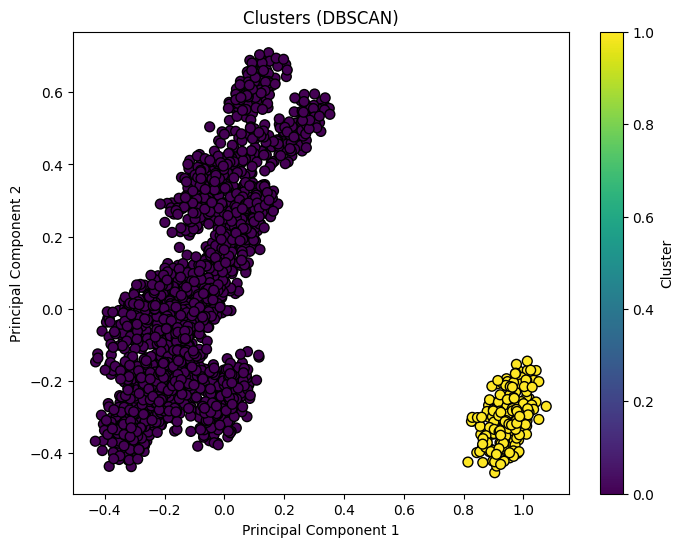

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

# Display the first few rows of the dataset
print(data.head())

# Data preprocessing
X = data.drop('label', axis=1)

# Min-Max scaling for feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Range of epsilon values for DBSCAN
eps_values = [0.1, 0.5, 1.0, 1.5, 2.0]

# Dictionary to store silhouette scores for each epsilon value
silhouette_scores_dbscan = {}

# Compute silhouette score for each epsilon value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_scaled)
    if len(np.unique(dbscan.labels_)) > 1:  # Ensure more than one cluster is formed
        silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
        silhouette_scores_dbscan[eps] = silhouette_avg
        print(f"For eps = {eps}, the silhouette score is {silhouette_avg:.4f}")

# Choose the epsilon value with the highest silhouette score
best_eps_dbscan = max(silhouette_scores_dbscan, key=silhouette_scores_dbscan.get)

# Perform DBSCAN clustering with the chosen epsilon value
dbscan = DBSCAN(eps=best_eps_dbscan)
dbscan.fit(X_scaled)

# Evaluate clustering performance using silhouette score for the entire model
silhouette_avg_dbscan = silhouette_score(X_scaled, dbscan.labels_)
print("Overall Silhouette Score (DBSCAN):", silhouette_avg_dbscan)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
